# Project : Prediction Of Heart Disease

#### Under supervision of Mrinmay Mj

# Problem Statement : Predict Heart disease from existing health conditions and lifestyle

                 Heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). 

                 About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 

                 Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. 

                 Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. 
               
               
##### References : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# Source of the dataset : 
#### https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# Description about dataset (Details of the columns) :


    HeartDisease : Responders that have ever reported having heart disease (CHD) or myocardial infarction (MI). (Yes / No)
    
    BMI : Body Mass Index
    
    Smoking : Responders that have smoked at least 100 ciagrettes in their lives (Yes / No)
    
    AlcoholDrinking : Adult men having more than 14 drinks per week and adult women having more than 7 drinks per week (Yes / No)
    
    Stroke : Repsonders that have had a stroke (Yes / No)
    
    PhysicalHealth : How many days during the last 30 days were the responders' physical health not good? (0-30 days)
    
    MentalHealth : How many days during the last 30 days was the responders' mental health not good? (0-30 days)
    
    DiffWalking : Responders have serious difficulty walking or climbing stairs? (Yes / No)
    
    Sex : Female or Male
    
    AgeCategory : 13 age groups: '18-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'
    
    Race : 7 race groups: 'White', 'Black', 'Asian', 'American Indian/Alaskan Native','Other', 'Hispanic'
    
    Diabetic : Responders' status of diabetes: 'Yes','No'','No, borderline diabetes', 'Yes (during pregnancy)'
    
    PhysicalActivity : Responders that reported doing physical activity or exercise during the last 30 days other than their regular job. (Yes / No)
    
    GenHealth : Responders' evaluation their own health by 5 categories: 'Poor','Fair','Good','Very good','Excellent'
    
    SleepTime : On average, how many hours of sleep do the responders get in a 24-hour period
    
    Asthma : Responders that have had asthma? (Yes / No)
    
    KidneyDisease : Responders that have had kiney disease except kidney stones, bladder infection, or incontinence (Yes / No)
    
    SkinCancer : Responders that have had skin cancer? (Yes / No)
    
###### References : https://www.kaggle.com/code/davos2910/eda-and-prediction-for-heart-disease-auc-0-86

# Major Findings :

### Comparison between Different Classification Algorithms

Accuracy using Logistics : 0.9172

Accuracy using Decision Tree : 0.9164

Accuracy using Linear SVM : 0.9156

Accuracy using Random Forest : 0.9051

Accuracy using Gaussian Naive Bayes : 0.8388

Accuracy using KNN : 0.9010

### Comparison between different Optimization Algorithms used through Neural Netowrk : 

Train Accuracy using Vanilla GD : 0.9140
|| Test Accuracy using Vanilla GD : 0.9157
|| Slightly Overfit!


Train Accuracy using Stochastic GD : 0.9141
|| Test Accuracy using Stochastics GD : 0.9148

Train Accuracy using MiniBatch ADAM : 0.9158
|| Test Accuracy using MiniBatch ADAM : 0.9173

Train Accuracy using MiniBatch AdaGrad : 0.9133
|| Test Accuracy using MiniBatch AdaGrad : 0.9150

Train Accuracy using MiniBatch RMSProp : 0.9174
|| Test Accuracy using MiniBatch RMSProp : 0.9174

# Importing necessary libraries

In [ ]:
# Tools needed
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# Models from SkLearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score


#Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential, layers 
from tensorflow.keras.layers import Dense, Dropout, InputLayer

from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

# Reading the dataset

In [ ]:
data = pd.read_csv('heart.csv'); data.rename(columns = {'Sex':'Gender'}, inplace = True); data.head(n=10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


# Checking of existence of NA Values

In [ ]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Gender              0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

##### Observations : The whole dataset contains No NA values

# Info about data and datatype of all the column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Gender            319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

##### Observations : We have to convert all the object column to numerical column to further work on it

# Checking number of unique values of every column

In [ ]:
data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Gender                 2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

##### Observations : 
                      Looking at the number of unique values, we can decide that BMI, PhysicalHealth, MentalHealth, SleepTime are conitunous columns and rest are categorical. 
                      AgeCategory shouldn't be categorical, so I will apply a function to calculate the mean age and make it a continuous feature 

# Converting AgeCategory to continuous column by replacing with mean

In [ ]:
data.AgeCategory.replace(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'], [57, 80, 67, 77, 42, 72, 62, 52, 47, 20, 37, 32, 27], inplace=True)

##### Observations : 
    Finally, we can say :
    
    Categorical Features: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic,PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer 
    
    Continuous Features: BMI, PhysicalHealth, MentalHealth, AgeCategory, SleepTime

# Checking the Unique Values of every column

In [ ]:
pd.Series({col:data[col].unique() for col in data})

HeartDisease                                                [No, Yes]
BMI                 [16.6, 20.34, 26.58, 24.21, 23.71, 28.87, 21.6...
Smoking                                                     [Yes, No]
AlcoholDrinking                                             [No, Yes]
Stroke                                                      [No, Yes]
PhysicalHealth      [3.0, 0.0, 20.0, 28.0, 6.0, 15.0, 5.0, 30.0, 7...
MentalHealth        [30.0, 0.0, 2.0, 5.0, 15.0, 8.0, 4.0, 3.0, 10....
DiffWalking                                                 [No, Yes]
Gender                                                 [Female, Male]
AgeCategory         [57, 80, 67, 77, 42, 72, 62, 52, 47, 20, 37, 3...
Race                [White, Black, Asian, American Indian/Alaskan ...
Diabetic            [Yes, No, No, borderline diabetes, Yes (during...
PhysicalActivity                                            [Yes, No]
GenHealth                    [Very good, Fair, Good, Poor, Excellent]
SleepTime           

##### Observations : The categorical variables which have more than two category, we have to convert them to binary category. Such as Race, Diabetic, GenHealth

# Pie plot of Binary Categorical Features

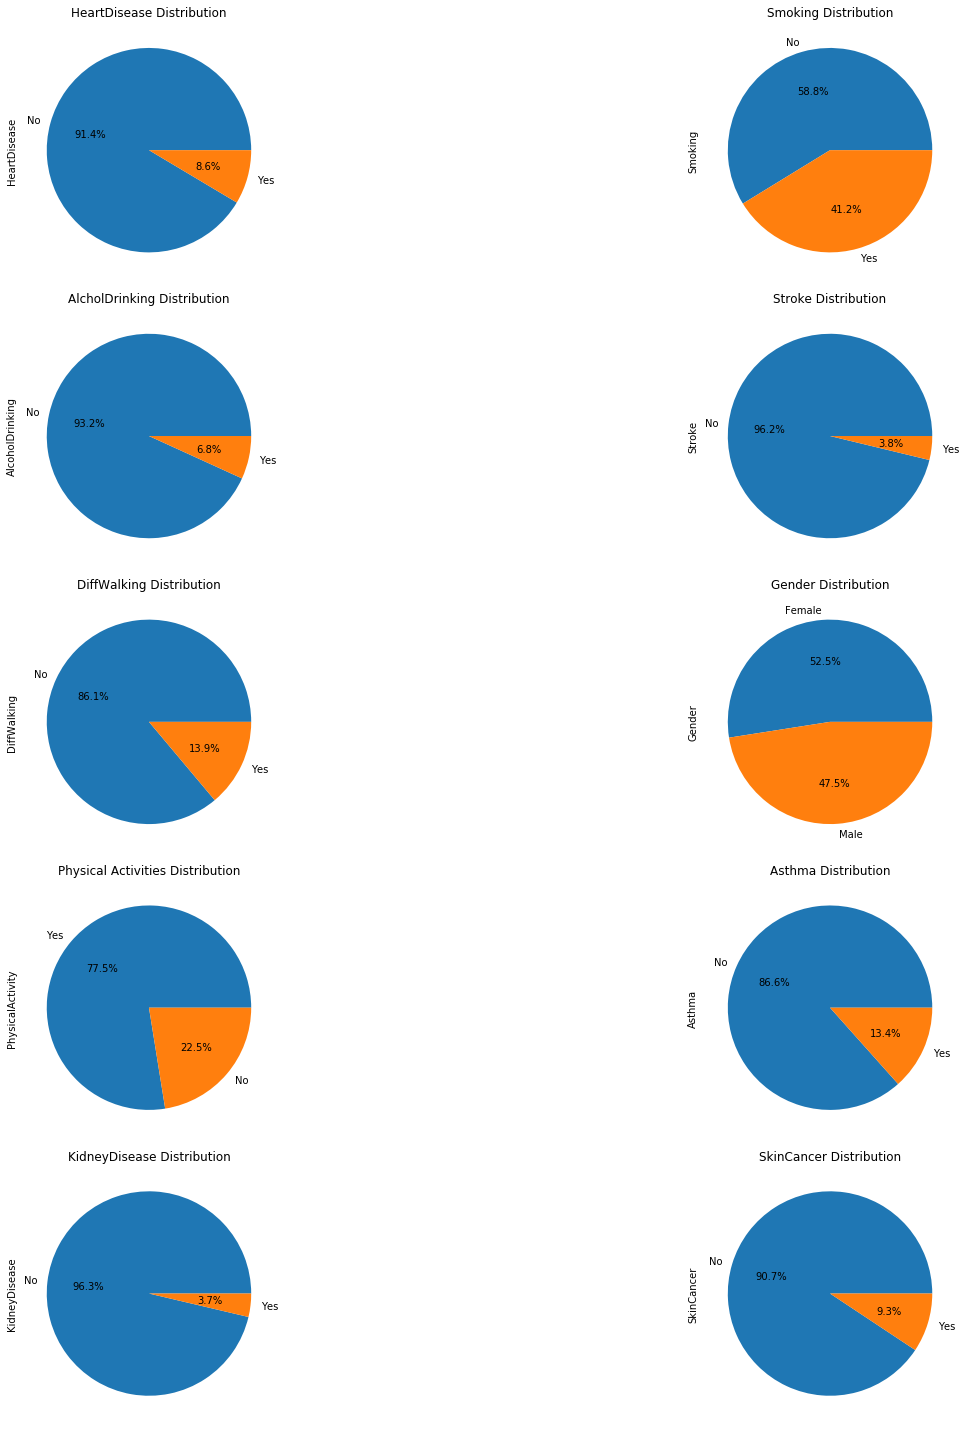

In [ ]:
fig, axes = plt.subplots(5,2)

a1 = data['HeartDisease'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[0][0])
a1.set_title('HeartDisease Distribution') 

a2 = data['Smoking'].value_counts().plot.pie(autopct = '%1.1f%%',ax = axes[0][1])
a2.set_title('Smoking Distribution') 

a3 = data['AlcoholDrinking'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[1][0])
a3.set_title('AlcholDrinking Distribution') 

a4 = data['Stroke'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[1][1])
a4.set_title('Stroke Distribution') 

a5 = data['DiffWalking'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[2][0])
a5.set_title('DiffWalking Distribution') 

a6 = data['Gender'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[2][1])
a6.set_title('Gender Distribution') 

a7 = data['PhysicalActivity'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[3][0])
a7.set_title('Physical Activities Distribution') 

a8 = data['Asthma'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[3][1])
a8.set_title('Asthma Distribution') 

a9 = data['KidneyDisease'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[4][0])
a9.set_title('KidneyDisease Distribution') 

a10 = data['SkinCancer'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[4][1])
a10.set_title('SkinCancer Distribution') 

fig.set_size_inches(25,20)
plt.tight_layout()

plt.show()

##### Observations : Other than Smoking and Gender, every other feature has skewed distribution!

# Barplot of multi-categorical features

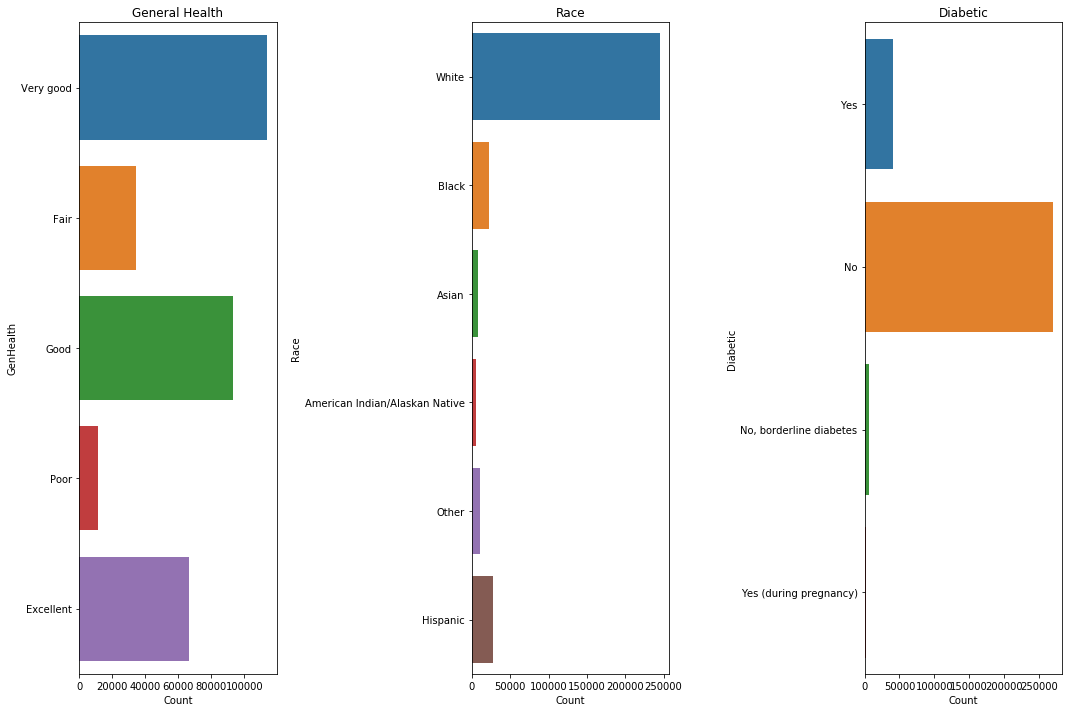

In [ ]:
fig, axes = plt.subplots(1,3)

a1 = sns.countplot(y = data['GenHealth'], linewidth = 1.2, ax = axes[0])
a1.set_title('General Health')
a1.set_xlabel('Count')

a2 = sns.countplot(y = data['Race'], linewidth = 1.2, ax = axes[1])
a2.set_title('Race')
a2.set_xlabel('Count')

a3 = sns.countplot(y = data['Diabetic'], linewidth = 1.2, ax = axes[2])
a3.set_title('Diabetic')
a3.set_xlabel('Count')

fig.set_size_inches(15,10)
plt.tight_layout()

##### Observations : All the three features have more or less skewed distribution

# Converting Diabetic columns from multicategory to binary category

In [ ]:
data['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [ ]:
data.Diabetic.replace(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'], ['Yes', 'No', 'No', 'Yes'], inplace=True)

# Converting GenHealth columns from multicategory to binary category

In [ ]:
data['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [ ]:
data.GenHealth.replace(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], ['Good', 'Bad', 'Good', 'Bad', 'Good'], inplace=True)

# Converting Race columns from multicategory to binary category

In [ ]:
data['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [ ]:
data.Race.replace(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], ['White', 'Non-White', 'Non-White', 'Non-White', 'Non-White', 'Non-White'], inplace=True)

# Checking the distribution after converting GenHealth, Race & Diabetic to binary features

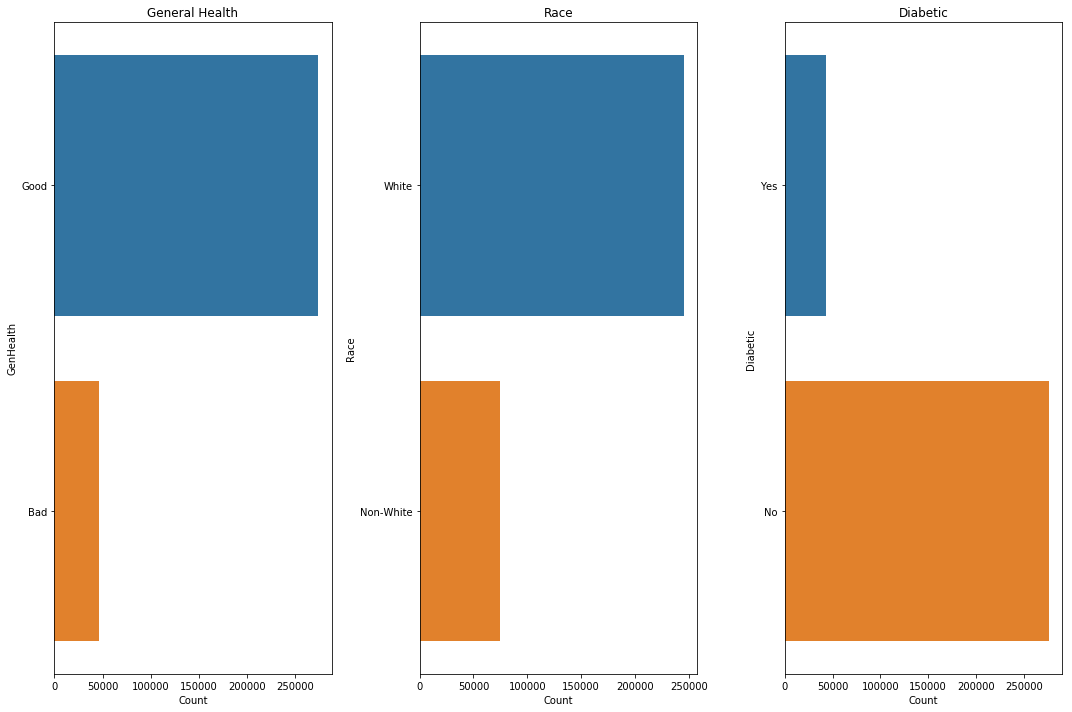

In [ ]:
fig, axes = plt.subplots(1,3)

a1 = sns.countplot(y = data['GenHealth'], linewidth = 1.2, ax = axes[0])
a1.set_title('General Health')
a1.set_xlabel('Count')

a2 = sns.countplot(y = data['Race'], linewidth = 1.2, ax = axes[1])
a2.set_title('Race')
a2.set_xlabel('Count')

a3 = sns.countplot(y = data['Diabetic'], linewidth = 1.2, ax = axes[2])
a3.set_title('Diabetic')
a3.set_xlabel('Count')

fig.set_size_inches(15,10)
plt.tight_layout()

##### Observations : All the three fetures have skewed distribution

# Checking the Unique Values of every column

In [ ]:
pd.Series({col:data[col].unique() for col in data})

HeartDisease                                                [No, Yes]
BMI                 [16.6, 20.34, 26.58, 24.21, 23.71, 28.87, 21.6...
Smoking                                                     [Yes, No]
AlcoholDrinking                                             [No, Yes]
Stroke                                                      [No, Yes]
PhysicalHealth      [3.0, 0.0, 20.0, 28.0, 6.0, 15.0, 5.0, 30.0, 7...
MentalHealth        [30.0, 0.0, 2.0, 5.0, 15.0, 8.0, 4.0, 3.0, 10....
DiffWalking                                                 [No, Yes]
Gender                                                 [Female, Male]
AgeCategory         [57, 80, 67, 77, 42, 72, 62, 52, 47, 20, 37, 3...
Race                                               [White, Non-White]
Diabetic                                                    [Yes, No]
PhysicalActivity                                            [Yes, No]
GenHealth                                                 [Good, Bad]
SleepTime           

# Checking number of binary categorical columns now!

In [ ]:
data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Gender                 2
AgeCategory           13
Race                   2
Diabetic               2
PhysicalActivity       2
GenHealth              2
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

##### Observations : All the categorical columns are of now Binary Category

## Relation of different categorical features with HeartDisease

In [ ]:
cat_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'AgeCategory', 'Gender','Race', 'Diabetic', 'PhysicalActivity','GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

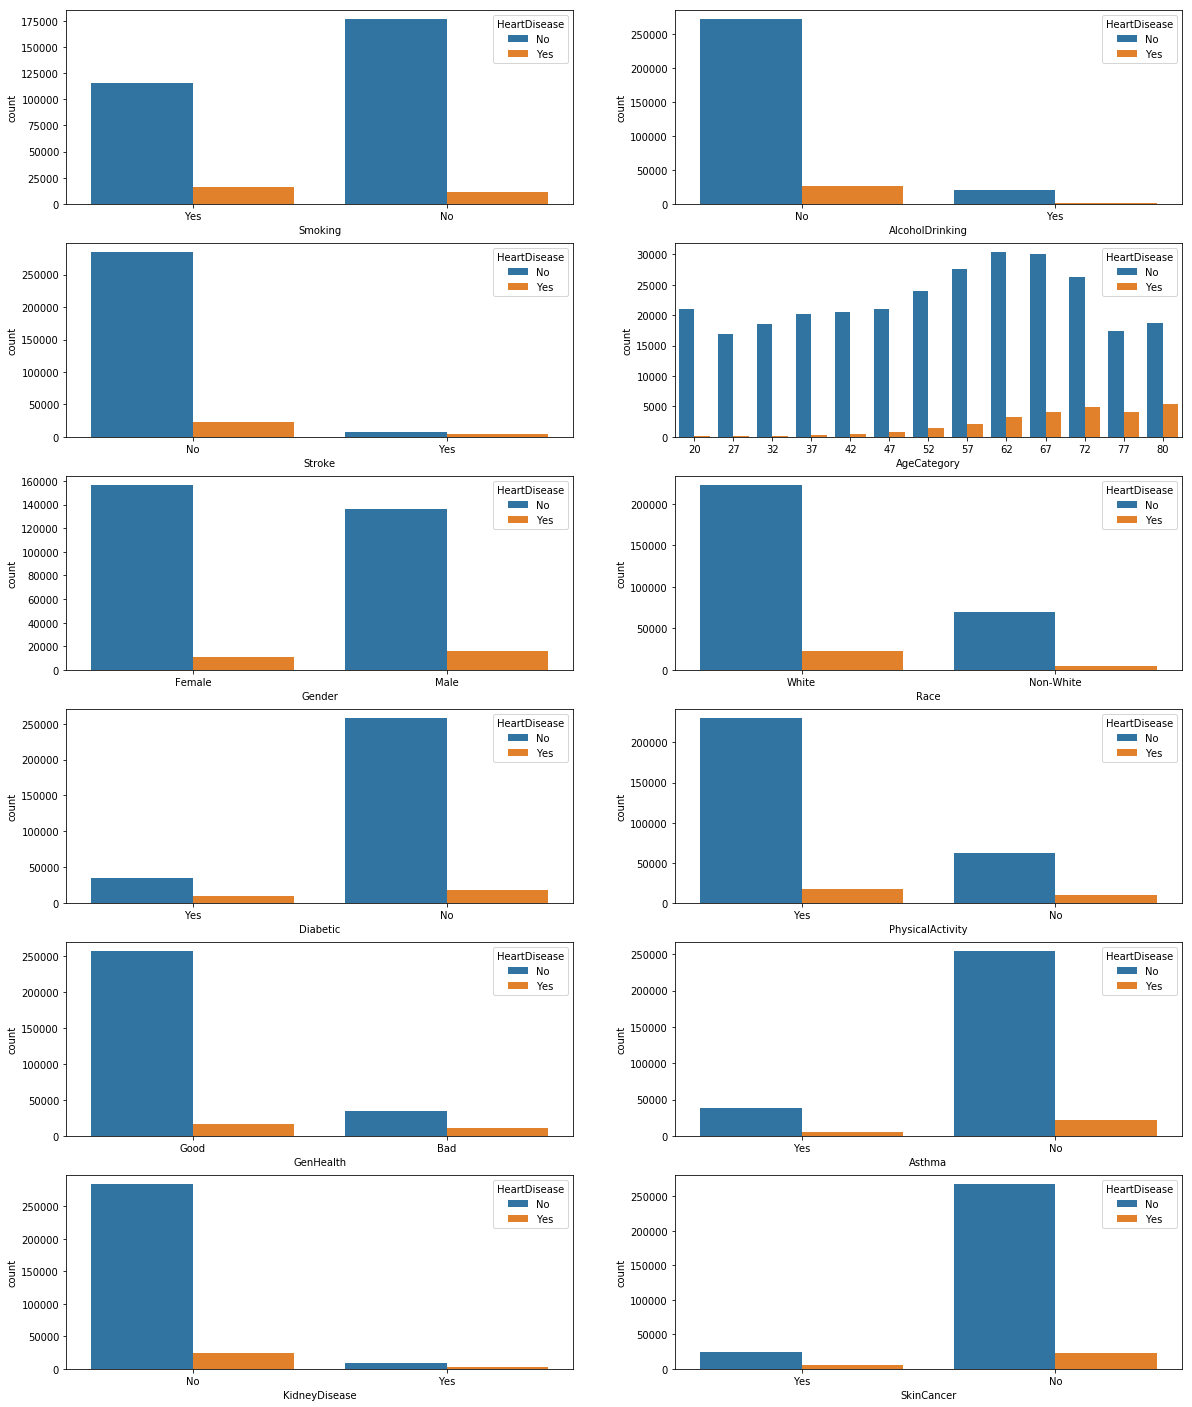

In [ ]:
i = 1
plt.figure(figsize = (20,25))
for feature in cat_columns:
    plt.subplot(6,2,i)
    sns.countplot(x = feature, hue = 'HeartDisease', data = data)
    i = i + 1

##### References : https://www.kaggle.com/code/georgyzubkov/heart-eda-and-ml

##### Observations : 

    With respective to Gender : 
    More Females were tested than males
    Males are more likely to have heart disease than females
    
    With respective to Smoking :
    Most heart disease patients smoke.
    People who smoke are approximately twice as likely to have heart disease than people who don't smoke.
    
    With Respective to Race :
    White People are more likely to have heart disease
    
    With Respective to AgeCategory :
    We can see that people who are 80 or older are more likely to get HeartDiseases.

## Label encoding of categorical columns in the dataset

### lising of categorical variables which we want to encode

In [ ]:
list1 = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Race', 'Gender', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

### definig a function for label encoding the listed categorical column

In [ ]:
label_encoder = preprocessing.LabelEncoder()
for i in range(len(list1)):
    data[list1[i]] = label_encoder.fit_transform(data[list1[i]])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57,1,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,1,0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67,1,1,1,0,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77,1,0,0,1,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42,1,0,1,1,8.0,0,0,0


# checking datatypes after label encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Gender            319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

##### Observations : All columns are now numerical! Finally, We can start work on it!

# Separating Feature Columns and Target Column

In [ ]:
X = data.iloc[:,data.columns != 'HeartDisease']
y = data.HeartDisease

# Use StandardScaler() on continuous feature columns

In [ ]:
scaled_features = X.copy()
col_names = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'AgeCategory']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values) 
scaled_features[col_names] = features
X = scaled_features;X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,-1.844750,1,0,0,-0.046751,3.281069,0,0,0.151864,1,1,1,1,-1.460354,1,0,1
1,-1.256338,0,0,1,-0.424070,-0.490039,0,0,1.440691,1,0,1,1,-0.067601,0,0,0
2,-0.274603,1,0,0,2.091388,3.281069,0,1,0.712223,1,1,1,0,0.628776,1,0,0
3,-0.647473,0,0,0,-0.424070,-0.490039,0,0,1.272583,1,0,0,1,-0.763977,0,0,1
4,-0.726138,0,0,0,3.097572,-0.490039,1,0,-0.688676,1,0,1,1,0.628776,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.144019,1,0,0,0.456341,-0.490039,1,1,0.432043,0,1,0,0,-0.763977,1,0,0
319791,0.238291,1,0,0,-0.424070,-0.490039,0,1,-0.968856,0,0,1,1,-1.460354,1,0,0
319792,-0.642753,0,0,0,-0.424070,-0.490039,0,0,-0.408496,0,0,1,1,-0.763977,0,0,0
319793,0.705560,0,0,0,-0.424070,-0.490039,0,0,-1.529216,0,0,0,1,3.414282,0,0,0


# Correlation Matrix

### As we can't derive correlation between categorical and continuous columns (because it doesn't make any sense), we will find the spearman rank correlation matrix between the categorical columns and pearson correlation matrix between continuous columns

## Spearman Rank correlation matrix between categorical columns

In [ ]:
list2 = ['Smoking', 'AlcoholDrinking', 'Stroke', 'Race', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

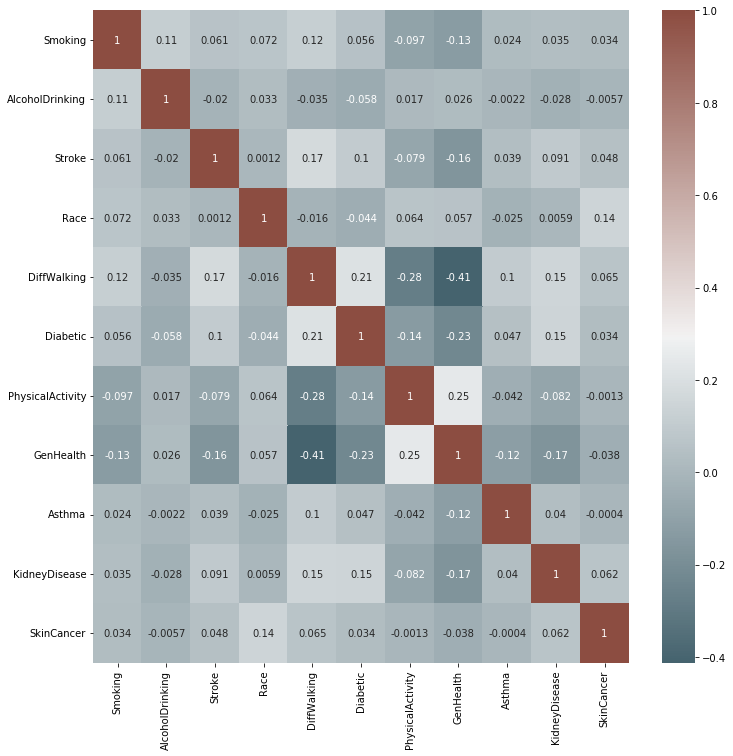

In [ ]:
cat_df = X[list2]
cmap = sns.diverging_palette(220, 20 ,s=50, l=40, n=6,as_cmap=True)
corr_X = cat_df.corr(method="spearman")
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_X,cmap=cmap,annot=True)
plt.show()

##### Observation : No significant correlation found to drop any columns! Max correlation coming as -0.41 between DiffWlking and GenHealth

# Pearson Correlation Matrix among continuous columns

In [ ]:
list3 = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'AgeCategory']

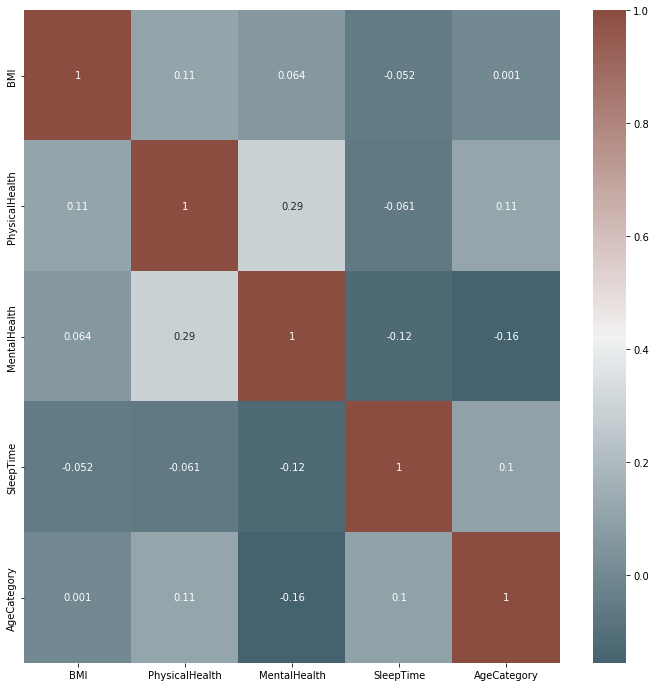

In [ ]:
con_df = X[list3]
cmap = sns.diverging_palette(220, 20 ,s=50, l=40, n=6,as_cmap=True)
corr_X1 = con_df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_X1,cmap=cmap,annot=True)
plt.show()

##### Observations :  No need to drop any continuous column

# dropping correlated columns(among categorical features)

In [ ]:
cor_matrix = (pd.DataFrame(cat_df)).corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]
X.drop(X.columns[to_drop], axis=1, inplace = True);X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Gender,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,-1.844750,1,0,0,-0.046751,3.281069,0,0,0.151864,1,1,1,1,-1.460354,1,0,1
1,-1.256338,0,0,1,-0.424070,-0.490039,0,0,1.440691,1,0,1,1,-0.067601,0,0,0
2,-0.274603,1,0,0,2.091388,3.281069,0,1,0.712223,1,1,1,0,0.628776,1,0,0
3,-0.647473,0,0,0,-0.424070,-0.490039,0,0,1.272583,1,0,0,1,-0.763977,0,0,1
4,-0.726138,0,0,0,3.097572,-0.490039,1,0,-0.688676,1,0,1,1,0.628776,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.144019,1,0,0,0.456341,-0.490039,1,1,0.432043,0,1,0,0,-0.763977,1,0,0
319791,0.238291,1,0,0,-0.424070,-0.490039,0,1,-0.968856,0,0,1,1,-1.460354,1,0,0
319792,-0.642753,0,0,0,-0.424070,-0.490039,0,0,-0.408496,0,0,1,1,-0.763977,0,0,0
319793,0.705560,0,0,0,-0.424070,-0.490039,0,0,-1.529216,0,0,0,1,3.414282,0,0,0


##### Observations : No columns dropped !

# splitting into train-test

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"X_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(255836, 17)
y_train:(255836,)
X_test:(63959, 17)
y_test:(63959,)


# Building the Logistics Model with Scikit Learn


Confusion Matrix


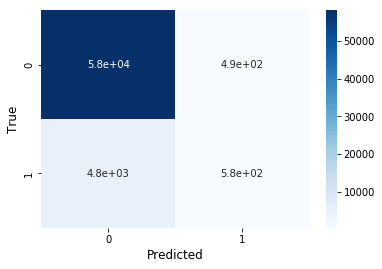

accuracy of the model: 0.9171813192826654


In [ ]:
log_reg_model = LogisticRegression(max_iter=2500,random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test) # Predictions


# Make the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()

print("accuracy of the model:", accuracy_score(y_test, y_pred))

![conf.png](attachment:conf.png)

##### References : https://medium.com/analytics-vidhya/confusion-matrix-in-machine-learning-91b6e2b3f9af

### Interpreation : 

    True Positive: I predicted positive and it’s true.

    True Negative:I predicted negative and it’s true.

    False Positive: (Type 1 Error) I predicted positive and it’s false.

    False Negative: (Type 2 Error)I predicted negative and it’s false.

##### Accuracy : 

    It is defined as the closeness or exact of predicted value to the actual value.

    Accuracy = (TP + TN)/(TP + TN + FP + FN)

# Building the Random Forest Model with Scikit Learn

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy of the model: ", metrics.accuracy_score(y_test, y_pred))

accuracy of the model:  0.9050798167576103


# Building the Decision Tree Model with Scikit Learn

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
print("accuracy of the model: ", metrics.accuracy_score(y_test, y_pred))

accuracy of the model:  0.9163839334573711


# Building the Gaussian Naive Bayes Model with Scikit Learn

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("accuracy of the model: ", metrics.accuracy_score(y_test, y_pred))

accuracy of the model:  0.8387717131287231


# Building the KNN Model with Scikit Learn

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("accuracy of the model:", metrics.accuracy_score(y_test, y_pred))

accuracy of the model: 0.900983442517863


# Building the Linear SVM Model with Scikit Learn

In [ ]:
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy of the model:", metrics.accuracy_score(y_test, y_pred))

accuracy of the model: 0.9157585328100815


##### References : https://www.geeksforgeeks.org/

# Build the same logistic regression model with a neural network mindset in Keras

### define and initiate an ANN model

# Implementing Gradient Descent

In [ ]:
model = Sequential()
# Add the input layer and first hidden layer
model.add(layers.Dense(units=12, activation='relu', input_dim=X_train.shape[1]))
# Add the second hidden layer
model.add(layers.Dense(units=8, activation='relu'))
# Add the output layer
model.add(layers.Dense(units=1, activation='sigmoid', name = 'output'))

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.05)

model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = X_train.shape[0], validation_split = 0.2, shuffle = False)

Epoch 1/50
1/1 [==============================] - 0s 432ms/step - loss: 0.8582 - accuracy: 0.1591 - val_loss: 0.8280 - val_accuracy: 0.2049
Epoch 2/50
1/1 [==============================] - 0s 47ms/step - loss: 0.8244 - accuracy: 0.2094 - val_loss: 0.7978 - val_accuracy: 0.2785
Epoch 3/50
1/1 [==============================] - 0s 51ms/step - loss: 0.7942 - accuracy: 0.2855 - val_loss: 0.7705 - val_accuracy: 0.3626
Epoch 4/50
1/1 [==============================] - 0s 49ms/step - loss: 0.7669 - accuracy: 0.3712 - val_loss: 0.7457 - val_accuracy: 0.4449
Epoch 5/50
1/1 [==============================] - 0s 60ms/step - loss: 0.7421 - accuracy: 0.4547 - val_loss: 0.7230 - val_accuracy: 0.5205
Epoch 6/50
1/1 [==============================] - 0s 60ms/step - loss: 0.7194 - accuracy: 0.5282 - val_loss: 0.7020 - val_accuracy: 0.5849
Epoch 7/50
1/1 [==============================] - 0s 48ms/step - loss: 0.6985 - accuracy: 0.5932 - val_loss: 0.6827 - val_accuracy: 0.6425
Epoch 8/50
1/1 [==========

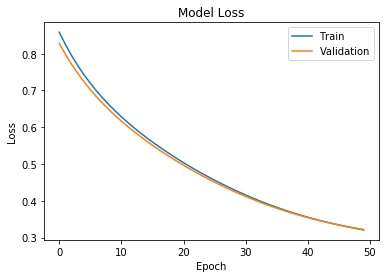

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.show()

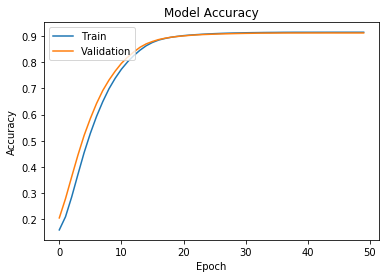

In [ ]:
# training and validation accuracy scores against the number of epochs
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
loss, acc = model.evaluate(X_train, y_train)
print(f"Train accuracy using GD is {acc:.10f}")

7995/7995 [==============================] - 3s 357us/step - loss: 0.3187 - accuracy: 0.9141
Train accuracy using GD is 0.9140543342


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test accuracy using GD is {acc:.10f}")

1999/1999 [==============================] - 1s 338us/step - loss: 0.3166 - accuracy: 0.9158
Test accuracy using GD is 0.9157741666


#### Observations : 
Train Accuracy is 91.40 %
|| Test Accuracy is 91.57 %
|| Slighly Overfit!

##### References : https://towardsdatascience.com/replicate-a-logistic-regression-model-as-an-artificial-neural-network-in-keras-cd6f49cf4b2c

# Implementing Stochastic Gradient Descent

Basic idea: **in gradient descent, just replace the full gradient (which is a sum) with a single gradient example**. Initialize the parameters at some value $w_0 \in R^d$, and decrease the value of the empirical risk iteratively by sampling a random index $\tilde i_t$ uniformly from $\{1, \ldots, n\}$ and then updating

$w_{t+1} = w_t - \alpha_t \cdot \nabla L_{\tilde i_t}(w_t)$

where as usual $w_t$ is the value of the parameter vector at time $t$, $\alpha_t$ is the _learning rate_ or _step size_, and $\nabla f_i$ denotes the gradient of the loss function of the $i$th training example.
Compared with gradient descent and Newton's method, SGD is simple to implement and runs each iteration faster.

##### References : https://www.deeplearningbook.org/contents/optimization.html

In [ ]:
model1 = keras.models.Sequential()

model1.add(layers.Dense(units=12, activation='relu', input_dim=X_train.shape[1]))

model1.add(layers.Dense(units=8, activation='relu'))

model1.add(layers.Dense(units=1, activation='sigmoid', name = 'output'))

In [ ]:
opt=tf.keras.optimizers.SGD(learning_rate=0.05)

model1.compile(optimizer = opt,
             loss = 'binary_crossentropy',
             metrics =['accuracy'])

In [ ]:
history1 = model1.fit(X_train, y_train, 
                        epochs=20, batch_size=1,
                        validation_split=0.2, 
                        shuffle=True)

Epoch 1/20
204668/204668 [==============================] - 98s 477us/step - loss: 0.2377 - accuracy: 0.9143 - val_loss: 0.2430 - val_accuracy: 0.9119
Epoch 2/20
204668/204668 [==============================] - 97s 476us/step - loss: 0.2360 - accuracy: 0.9147 - val_loss: 0.2385 - val_accuracy: 0.9132
Epoch 3/20
204668/204668 [==============================] - 96s 471us/step - loss: 0.2361 - accuracy: 0.9151 - val_loss: 0.2357 - val_accuracy: 0.9131
Epoch 4/20
204668/204668 [==============================] - 98s 478us/step - loss: 0.2362 - accuracy: 0.9147 - val_loss: 0.2387 - val_accuracy: 0.9119
Epoch 5/20
204668/204668 [==============================] - 99s 483us/step - loss: 0.2359 - accuracy: 0.9150 - val_loss: 0.2387 - val_accuracy: 0.9121
Epoch 6/20
204668/204668 [==============================] - 98s 478us/step - loss: 0.2361 - accuracy: 0.9147 - val_loss: 0.2427 - val_accuracy: 0.9131
Epoch 7/20
204668/204668 [==============================] - 97s 472us/step - loss: 0.2362 - ac

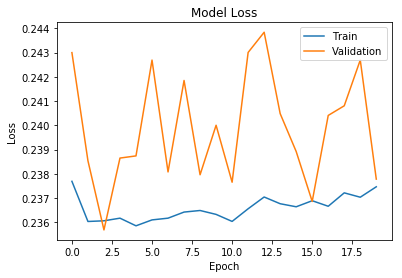

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.show()

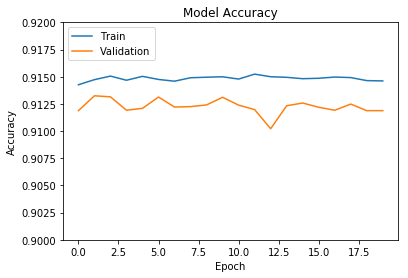

In [ ]:
# Plot training and validation accuracy scores
# against the number of epochs.
plt.plot(history1.history['accuracy'], label='Train')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')
plt.ylim(0.9,0.92)
plt.show()

In [ ]:
loss, acc = model1.evaluate(X_train, y_train)
print(f"Train accuracy using SGD is {acc:.4f}")

7995/7995 [==============================] - 4s 484us/step - loss: 0.2345 - accuracy: 0.9141
Train accuracy using SGD is 0.9141


In [ ]:
loss, acc = model1.evaluate(X_test, y_test)
print(f"Test accuracy using SGD is {acc:.4f}")

1999/1999 [==============================] - 1s 468us/step - loss: 0.2334 - accuracy: 0.9158
Test accuracy using SGD is 0.9158


##### Observations : Slightly Overfit!

##### References : https://towardsdatascience.com/replicate-a-logistic-regression-model-as-an-artificial-neural-network-in-keras-cd6f49cf4b2c

# Mini batch GD (optimier - Adam)

**Algorithm Adam**

*Input:* global learning rate factor $\alpha$, decay rates $\rho_1$ and $\rho_2$, initial parameters $w \in R^d$.

* Initialize $r \leftarrow 0 \in R^d$
* Initialize timestep $t \leftarrow 0$

* **loop**
  * update timestep $t \leftarrow t + 1$
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate first moment estimate $s_j \leftarrow \rho_1 s_j + (1 - \rho_1) g_j$ for all $j \in \{1, \ldots, d \}$
  * accumulate second moment estimate $r_j \leftarrow \rho_2 r_j + (1 - \rho_2) g_j^2$ for all $j \in \{1, \ldots, d \}$
  * correct first moment bias $\hat s \leftarrow \frac{s}{1 - \rho_1^t}$ 
  * correct second moment bias $\hat r \leftarrow \frac{r}{1 - \rho_2^t}$
  * update model $w_j \rightarrow w_j - \frac{\alpha}{\sqrt{\hat r_j}} \cdot \hat s_j$ for all $j \in \{1, \ldots, d \}$

##### References : https://www.deeplearningbook.org/contents/optimization.html

In [ ]:
model2 = Sequential()
# Add the input layer and first hidden layer
model2.add(layers.Dense(units=12, activation='relu', input_dim=X_train.shape[1]))
# Add the second hidden layer
model2.add(layers.Dense(units=8, activation='relu'))
# Add the output layer
model2.add(layers.Dense(units=1, activation='sigmoid', name = 'output'))

In [ ]:
model2.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics =['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, 
                        epochs=50, batch_size=64,
                        validation_split=0.2, 
                        shuffle=False)

Epoch 1/50
3198/3198 [==============================] - 3s 810us/step - loss: 0.2442 - accuracy: 0.9144 - val_loss: 0.2347 - val_accuracy: 0.9119
Epoch 2/50
3198/3198 [==============================] - 2s 777us/step - loss: 0.2295 - accuracy: 0.9148 - val_loss: 0.2335 - val_accuracy: 0.9125
Epoch 3/50
3198/3198 [==============================] - 3s 783us/step - loss: 0.2287 - accuracy: 0.9154 - val_loss: 0.2330 - val_accuracy: 0.9128
Epoch 4/50
3198/3198 [==============================] - 2s 762us/step - loss: 0.2281 - accuracy: 0.9161 - val_loss: 0.2327 - val_accuracy: 0.9128
Epoch 5/50
3198/3198 [==============================] - 2s 779us/step - loss: 0.2278 - accuracy: 0.9161 - val_loss: 0.2326 - val_accuracy: 0.9129
Epoch 6/50
3198/3198 [==============================] - 3s 793us/step - loss: 0.2276 - accuracy: 0.9163 - val_loss: 0.2325 - val_accuracy: 0.9128
Epoch 7/50
3198/3198 [==============================] - 2s 776us/step - loss: 0.2274 - accuracy: 0.9163 - val_loss: 0.2324 -

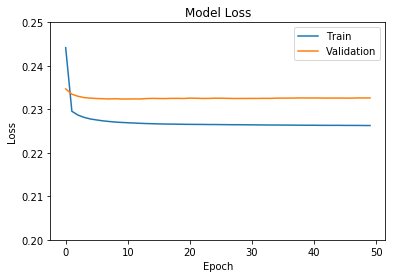

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.ylim(0.20,0.25)
plt.show()

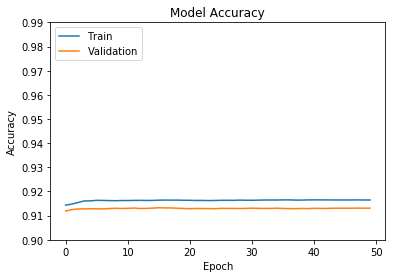

In [ ]:
# Plot training and validation accuracy scores
# against the number of epochs.
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')
plt.ylim(0.90,0.99)
plt.show()

In [ ]:
loss, acc = model2.evaluate(X_train, y_train)
print(f"Train accuracy using Mini Batch GD (Optimizer - Adam) is {acc:.4f}")

7995/7995 [==============================] - 3s 325us/step - loss: 0.2270 - accuracy: 0.9158
Train accuracy using Mini Batch GD (Optimizer - Adam) is 0.9158


In [ ]:
loss, acc = model2.evaluate(X_test, y_test)
print(f"Test accuracy using Mini Batch GD (Optimizer - Adam) is {acc:.4f}")

1999/1999 [==============================] - 1s 336us/step - loss: 0.2276 - accuracy: 0.9173
Test accuracy using Mini Batch GD (Optimizer - Adam) is 0.9173


##### Observations : Accuracy and loss remians same more or less throughout!

# Mini batch GD (optimizer - Adagrad)

**Algorithm AdaGrad**

*Input:* global learning rate factor $\alpha$, initial parameters $w \in R^d$.

* Initialize $r \leftarrow 0 \in R^d$

* **loop**
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate second moment estimate $r_j \leftarrow r_j + g_j^2$ for all $j \in \{1, \ldots, d \}$
  * update model $w_j \leftarrow w_j - \frac{\alpha}{\sqrt{r_j}} \cdot g_j$ for all $j \in \{1, \ldots, d \}$
  
##### References : https://www.deeplearningbook.org/contents/optimization.html  

In [ ]:
model3 = Sequential()
# Add the input layer and first hidden layer
model3.add(layers.Dense(units=12, activation='relu', input_dim=X_train.shape[1]))
# Add the second hidden layer
model3.add(layers.Dense(units=8, activation='relu'))
# Add the output layer
model3.add(layers.Dense(units=1, activation='sigmoid', name = 'output'))

In [ ]:
model3.compile(optimizer = 'adagrad',
             loss = 'binary_crossentropy',
             metrics =['accuracy'])

In [ ]:
history3 = model.fit(X_train, y_train, 
                        epochs=100, batch_size=64,
                        validation_split=0.2, 
                        shuffle=False)

Epoch 1/100
3198/3198 [==============================] - 2s 625us/step - loss: 0.2259 - accuracy: 0.9162 - val_loss: 0.2325 - val_accuracy: 0.9129
Epoch 2/100
3198/3198 [==============================] - 2s 634us/step - loss: 0.2259 - accuracy: 0.9161 - val_loss: 0.2325 - val_accuracy: 0.9128
Epoch 3/100
3198/3198 [==============================] - 2s 623us/step - loss: 0.2258 - accuracy: 0.9161 - val_loss: 0.2325 - val_accuracy: 0.9129
Epoch 4/100
3198/3198 [==============================] - 2s 624us/step - loss: 0.2258 - accuracy: 0.9161 - val_loss: 0.2325 - val_accuracy: 0.9129
Epoch 5/100
3198/3198 [==============================] - 2s 630us/step - loss: 0.2258 - accuracy: 0.9161 - val_loss: 0.2325 - val_accuracy: 0.9129
Epoch 6/100
3198/3198 [==============================] - 2s 630us/step - loss: 0.2258 - accuracy: 0.9162 - val_loss: 0.2325 - val_accuracy: 0.9128
Epoch 7/100
3198/3198 [==============================] - 2s 617us/step - loss: 0.2258 - accuracy: 0.9161 - val_loss: 0

3198/3198 [==============================] - 2s 622us/step - loss: 0.2258 - accuracy: 0.9161 - val_loss: 0.2325 - val_accuracy: 0.9128
Epoch 57/100
3198/3198 [==============================] - 2s 603us/step - loss: 0.2258 - accuracy: 0.9162 - val_loss: 0.2325 - val_accuracy: 0.9128
Epoch 58/100
3198/3198 [==============================] - 2s 623us/step - loss: 0.2258 - accuracy: 0.9162 - val_loss: 0.2325 - val_accuracy: 0.9128
Epoch 59/100
3198/3198 [==============================] - 2s 616us/step - loss: 0.2258 - accuracy: 0.9162 - val_loss: 0.2325 - val_accuracy: 0.9128
Epoch 60/100
3198/3198 [==============================] - 2s 632us/step - loss: 0.2258 - accuracy: 0.9162 - val_loss: 0.2325 - val_accuracy: 0.9128
Epoch 61/100
3198/3198 [==============================] - 2s 629us/step - loss: 0.2258 - accuracy: 0.9162 - val_loss: 0.2325 - val_accuracy: 0.9127
Epoch 62/100
3198/3198 [==============================] - 2s 641us/step - loss: 0.2258 - accuracy: 0.9162 - val_loss: 0.2325 

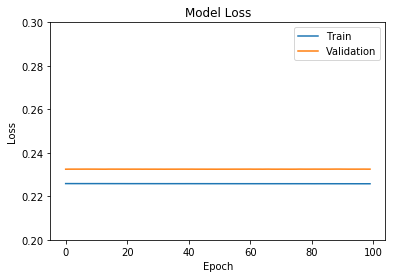

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history3.history['loss'], label='Train')
plt.plot(history3.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.ylim(0.20, 0.30)
plt.show()

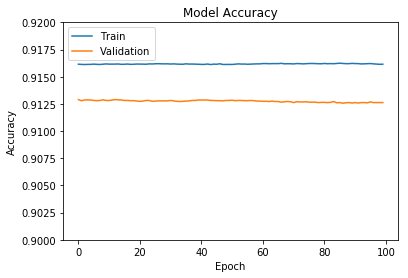

In [ ]:
# Plot training and validation accuracy scores
# against the number of epochs.
plt.plot(history3.history['accuracy'], label='Train')
plt.plot(history3.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')
plt.ylim(0.90,0.92)
plt.show()

In [ ]:
loss, acc = model3.evaluate(X_train, y_train)
print(f"Train accuracy using Mini Batch GD (Optimizer - Adagrad) is {acc:.4f}")

7995/7995 [==============================] - 3s 313us/step - loss: 0.4898 - accuracy: 0.9133
Train accuracy using Mini Batch GD (Optimizer - Adagrad) is 0.9133


In [ ]:
loss, acc = model3.evaluate(X_test, y_test)
print(f"Test accuracy using Mini Batch GD (Optimizer - Adagrad) is {acc:.4f}")

1999/1999 [==============================] - 1s 320us/step - loss: 0.4887 - accuracy: 0.9150
Test accuracy using Mini Batch GD (Optimizer - Adagrad) is 0.9150


##### References : https://towardsdatascience.com/replicate-a-logistic-regression-model-as-an-artificial-neural-network-in-keras-cd6f49cf4b2c

# Mini batch GD (optimier - RMS Prop)

**Algorithm RMSProp**

*Input:* global learning rate factor $\alpha$, decay rate $\rho$, initial parameters $w \in R^d$.

* Initialize $r \leftarrow 0 \in R^d$

* **loop**
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate second moment estimate $r_j \leftarrow \rho r_j + (1 - \rho) g_j^2$ for all $j \in \{1, \ldots, d \}$
  * update model $w_j \rightarrow w_j - \frac{\alpha}{\sqrt{r_j}} \cdot g_j$ for all $j \in \{1, \ldots, d \}$
  
##### References : https://www.deeplearningbook.org/contents/optimization.html

In [ ]:
model4 = Sequential()
# Add the input layer and first hidden layer
model4.add(layers.Dense(units=12, activation='relu', input_dim=X_train.shape[1]))
# Add the second hidden layer
model4.add(layers.Dense(units=8, activation='relu'))
# Add the output layer
model4.add(layers.Dense(units=1, activation='sigmoid', name = 'output'))

In [ ]:
model4.compile(optimizer = 'RMSprop',
             loss = 'binary_crossentropy',
             metrics =['accuracy'])

In [ ]:
history4 = model4.fit(X_train, y_train, 
                        epochs=100, batch_size=64,
                        validation_split=0.2, 
                        shuffle=False)

Epoch 1/100
3198/3198 [==============================] - 2s 682us/step - loss: 0.2452 - accuracy: 0.9125 - val_loss: 0.2353 - val_accuracy: 0.9126
Epoch 2/100
3198/3198 [==============================] - 2s 662us/step - loss: 0.2299 - accuracy: 0.9156 - val_loss: 0.2338 - val_accuracy: 0.9130
Epoch 3/100
3198/3198 [==============================] - 2s 667us/step - loss: 0.2290 - accuracy: 0.9158 - val_loss: 0.2335 - val_accuracy: 0.9131
Epoch 4/100
3198/3198 [==============================] - 2s 654us/step - loss: 0.2287 - accuracy: 0.9159 - val_loss: 0.2333 - val_accuracy: 0.9130
Epoch 5/100
3198/3198 [==============================] - 2s 650us/step - loss: 0.2286 - accuracy: 0.9159 - val_loss: 0.2333 - val_accuracy: 0.9130
Epoch 6/100
3198/3198 [==============================] - 2s 645us/step - loss: 0.2285 - accuracy: 0.9160 - val_loss: 0.2335 - val_accuracy: 0.9128
Epoch 7/100
3198/3198 [==============================] - 2s 649us/step - loss: 0.2285 - accuracy: 0.9160 - val_loss: 0

3198/3198 [==============================] - 2s 636us/step - loss: 0.2283 - accuracy: 0.9160 - val_loss: 0.2334 - val_accuracy: 0.9130
Epoch 57/100
3198/3198 [==============================] - 2s 651us/step - loss: 0.2283 - accuracy: 0.9160 - val_loss: 0.2335 - val_accuracy: 0.9132
Epoch 58/100
3198/3198 [==============================] - 2s 656us/step - loss: 0.2283 - accuracy: 0.9160 - val_loss: 0.2335 - val_accuracy: 0.9131
Epoch 59/100
3198/3198 [==============================] - 2s 649us/step - loss: 0.2282 - accuracy: 0.9161 - val_loss: 0.2335 - val_accuracy: 0.9130
Epoch 60/100
3198/3198 [==============================] - 2s 640us/step - loss: 0.2282 - accuracy: 0.9160 - val_loss: 0.2335 - val_accuracy: 0.9132
Epoch 61/100
3198/3198 [==============================] - 2s 653us/step - loss: 0.2282 - accuracy: 0.9161 - val_loss: 0.2334 - val_accuracy: 0.9132
Epoch 62/100
3198/3198 [==============================] - 2s 648us/step - loss: 0.2282 - accuracy: 0.9161 - val_loss: 0.2336 

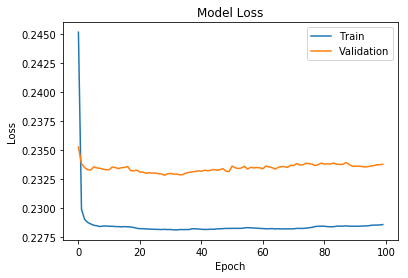

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history4.history['loss'], label='Train')
plt.plot(history4.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.show()

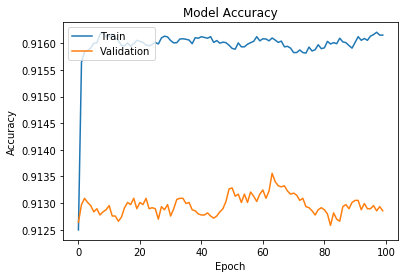

In [ ]:
# Plot training and validation accuracy scores
# against the number of epochs.
plt.plot(history4.history['accuracy'], label='Train')
plt.plot(history4.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
loss, acc = model4.evaluate(X_test, y_test)
print(f"Train accuracy using Mini Batch GD (Optimizer - RMSprop) is {acc:.4f}")

1999/1999 [==============================] - 1s 330us/step - loss: 0.2282 - accuracy: 0.9174
Train accuracy using Mini Batch GD (Optimizer - RMSprop) is 0.9174


In [ ]:
loss, acc = model4.evaluate(X_test, y_test)
print(f"Test accuracy using Mini Batch GD (Optimizer - RMSprop) is {acc:.4f}")

1999/1999 [==============================] - 1s 331us/step - loss: 0.2282 - accuracy: 0.9174
Test accuracy using Mini Batch GD (Optimizer - RMSprop) is 0.9174


##### References : https://towardsdatascience.com/replicate-a-logistic-regression-model-as-an-artificial-neural-network-in-keras-cd6f49cf4b2c

# Compare the optimizers

## Loss Graph

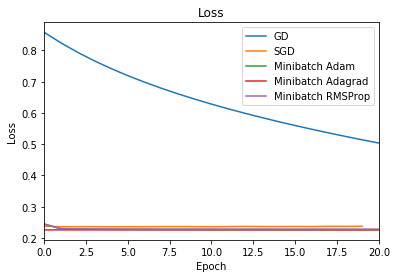

In [ ]:
plt.plot(history.history['loss'], label='GD')
plt.plot(history1.history['loss'], label='SGD')
plt.plot(history2.history['loss'], label='Minibatch Adam')
plt.plot(history3.history['loss'], label='Minibatch Adagrad')
plt.plot(history4.history['loss'], label='Minibatch RMSProp')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(0, 20) 
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

## Accuracy Graph

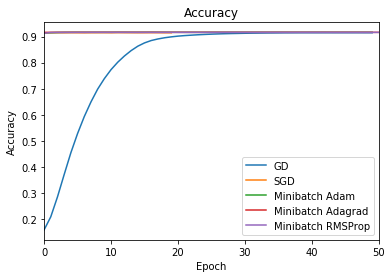

In [ ]:
plt.plot(history.history['accuracy'], label='GD')
plt.plot(history1.history['accuracy'], label='SGD')
plt.plot(history2.history['accuracy'], label='Minibatch Adam')
plt.plot(history3.history['accuracy'], label='Minibatch Adagrad')
plt.plot(history4.history['accuracy'], label='Minibatch RMSProp')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim(0, 50) 
plt.title('Accuracy')
plt.legend(loc='lower right')
plt.show()